In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.to_csv(r"C:\Users\pavan\Desktop\Mounika\Learning\YouTube\Decision trees\titanic.csv", index=False)

In [6]:
titanic = pd.read_csv("titanic.csv")

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
titanic.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [64]:
titanic.Age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

<AxesSubplot:ylabel='Density'>

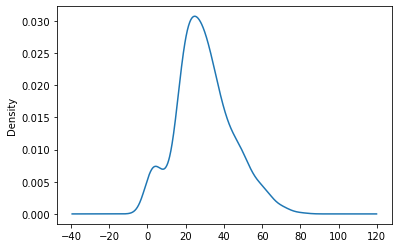

In [65]:
titanic.Age.plot(kind = "kde")

In [66]:
titanic.shape

(891, 12)

In [67]:
titanic['Age'].mean()

29.69911764705882

In [68]:
titanic['Age'].median()

28.0

In [69]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [70]:
titanic.Cabin.value_counts().head()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

In [71]:
titanic.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [72]:
titanic['Cabin'] = titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])

In [73]:
titanic.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.002245
dtype: float64

In [74]:
# 2 observations has null values in embarked column, simply dropping it
titanic.dropna(inplace=True)

In [75]:
features = titanic.drop(['PassengerId','Name', 'Ticket', 'Survived'], axis=1)
target = titanic.Survived

In [76]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,B96 B98,S


In [77]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [79]:
features.select_dtypes('O').head(2)

,Sex,Cabin,Embarked
0,male,B96 B98,S
1,female,C85,C


In [80]:
features['sex_n'] = le.fit_transform(features['Sex'])
features['cabin_n'] = le.fit_transform(features['Cabin'])
features['embarked_n'] = le.fit_transform(features['Embarked'])

In [81]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,sex_n,cabin_n,embarked_n
0,3,male,22.000000,1,0,7.2500,B96 B98,S,1,46,2
1,1,female,38.000000,1,0,71.2833,C85,C,0,80,0
2,3,female,26.000000,0,0,7.9250,B96 B98,S,0,46,2
3,1,female,35.000000,1,0,53.1000,C123,S,0,54,2
4,3,male,35.000000,0,0,8.0500,B96 B98,S,1,46,2
...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,B96 B98,S,1,46,2
887,1,female,19.000000,0,0,30.0000,B42,S,0,29,2
888,3,female,29.699118,1,2,23.4500,B96 B98,S,0,46,2
889,1,male,26.000000,0,0,30.0000,C148,C,1,59,0


In [82]:
# now we will drop onject data types
features = features.drop(['Sex','Cabin','Embarked'],axis=1)

In [83]:
features.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
sex_n         0
cabin_n       0
embarked_n    0
dtype: int64

In [84]:
features

,Pclass,Age,SibSp,Parch,Fare,sex_n,cabin_n,embarked_n
0,3,22.000000,1,0,7.2500,1,46,2
1,1,38.000000,1,0,71.2833,0,80,0
2,3,26.000000,0,0,7.9250,0,46,2
3,1,35.000000,1,0,53.1000,0,54,2
4,3,35.000000,0,0,8.0500,1,46,2
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,46,2
887,1,19.000000,0,0,30.0000,0,29,2
888,3,29.699118,1,2,23.4500,0,46,2
889,1,26.000000,0,0,30.0000,1,59,0


In [85]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

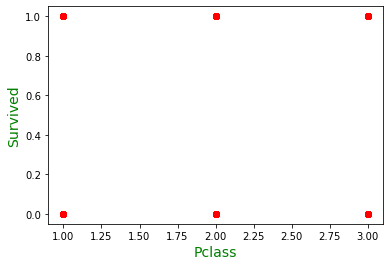

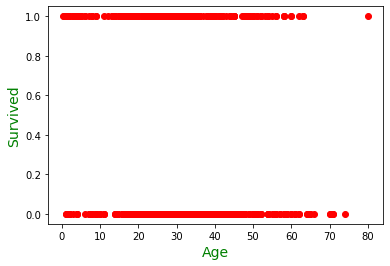

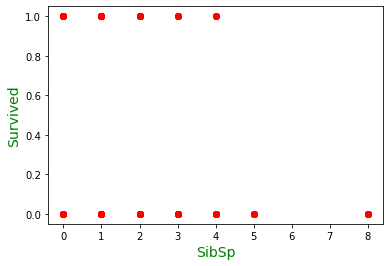

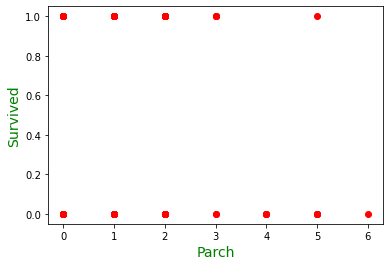

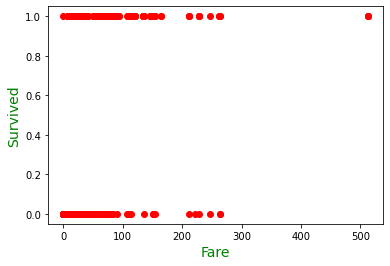

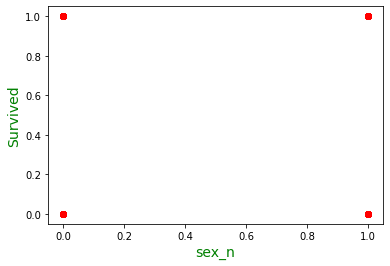

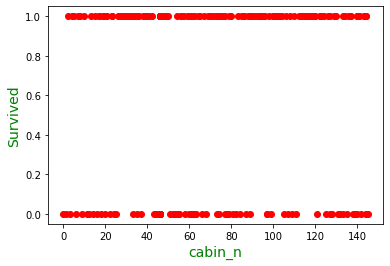

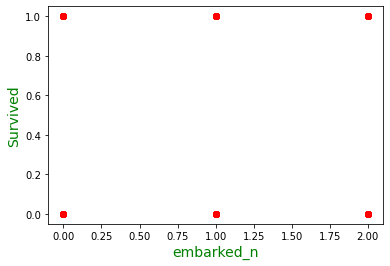

In [87]:
cols =['Pclass','Age','SibSp','Parch','Fare','sex_n','cabin_n','embarked_n']
for i in cols:
    plt.scatter(features[i], target, color = "red")
    plt.xlabel(i, color= "green", size = 14)
    plt.ylabel("Survived", color = "green", size = 14)
    plt.show()
    

In [89]:
features.shape

(889, 8)

In [90]:
target.shape

(889,)

In [91]:
from sklearn.model_selection import train_test_split

xtrain ,xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2)

In [92]:
len(xtrain)

711

In [93]:
len(xtest)

178

In [88]:
# by seeing scatter plot, Logistic regression will work effectively, lets c

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [94]:
model_lr.fit(xtrain, ytrain)

LogisticRegression()

In [95]:
model_lr.score(xtest, ytest)

0.8146067415730337

In [96]:
model_lr_predictions = model_lr.predict(xtest)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [98]:
accuracy_score(ytest, model_lr_predictions)

0.8146067415730337

In [99]:
confusion_matrix(ytest, model_lr_predictions)

array([[105,  17],
       [ 16,  40]], dtype=int64)

In [100]:
print(classification_report(ytest, model_lr_predictions))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       122
           1       0.70      0.71      0.71        56

    accuracy                           0.81       178
   macro avg       0.78      0.79      0.79       178
weighted avg       0.82      0.81      0.82       178



### lets try for decision trees

In [101]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()

In [102]:
model_dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [103]:
model_dtc.score(xtest, ytest)

0.7921348314606742

In [104]:
model_dtc.score(xtrain, ytrain)

0.9873417721518988

In [105]:
model_dtc.score(xtrain, ytrain) -model_dtc.score(xtest, ytest)

0.19520694069122457

In [195]:
parameter = {'min_samples_leaf':[1,2,3,4,5,6,7,9,None], 'max_depth':[1,2,3,4,5,6,7,9,None]}

In [196]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=model_dtc, param_grid=parameter,cv = 3)

In [197]:
gs.fit(features, target)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=5),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 9, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 9, None]})

In [198]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [199]:
model_dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)

In [200]:
model_dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5)

In [201]:
model_dtc.score(xtest,ytest)

0.8314606741573034

In [202]:
model_dtc_predictions = model_dtc.predict(xtest)

In [203]:
accuracy_score(ytest, model_dtc_predictions)

0.8314606741573034

In [204]:
confusion_matrix(ytest, model_dtc_predictions)

array([[107,  15],
       [ 15,  41]], dtype=int64)

In [205]:
print(classification_report(ytest, model_dtc_predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       122
           1       0.73      0.73      0.73        56

    accuracy                           0.83       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.83      0.83      0.83       178



### Chceking

In [207]:
xtest[:5]

,Pclass,Age,SibSp,Parch,Fare,sex_n,cabin_n,embarked_n
497,3,29.699118,0,0,15.1000,1,46,2
143,3,19.000000,0,0,6.7500,1,46,1
461,3,34.000000,0,0,8.0500,1,46,2
698,1,49.000000,1,1,110.8833,1,74,0
125,3,12.000000,1,0,11.2417,1,46,0


In [208]:
ytest[:5]

497    0
143    0
461    0
698    0
125    1
Name: Survived, dtype: int64

In [209]:
model_dtc.predict(xtest[:5])

array([0, 0, 0, 0, 0], dtype=int64)